In [1]:
#pip install vk_api

In [2]:
pip install vk

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install transliterate

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install torch

In [7]:
pip install umap

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install hdbscan

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install nb_black

Note: you may need to restart the kernel to use updated packages.


In [10]:
import vk
import time
import pandas as pd

import json
import requests
import folium
import math
import datetime as dt
import os
import re
import random
import pymorphy2
import urllib
import nltk

import warnings

warnings.filterwarnings("ignore")

pd.options.display.max_colwidth = 1000
from datetime import datetime, date
import seaborn as sns
import numpy as np
from scipy import stats
from collections import Counter
from transliterate import translit
from numpy import mean, std, var

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

import re
import string
from nltk.corpus import stopwords
import nltk
from pymystem3 import Mystem
from string import punctuation
from wordcloud import WordCloud
import ast
from scipy.stats.contingency import margins
from transformers import pipeline, AutoTokenizer, AutoModel
import torch
import transformers
import umap
import hdbscan
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
import logging

logging.captureWarnings(True)
%load_ext nb_black

<IPython.core.display.Javascript object>

## Data parsing

In [11]:
# vk_api = vk.API(
#     access_token="vk1.a.eJNAwbeY3rLH2B8tTLlhg_q2AwyLM1m9VasVbfWs1wkdXDA8GR1ebwQduE5cYdenlPbmMxAjSwwd-mGdUVHBUQKwb8JZVd86QBgU9IsOYYmBQP_KKUEjmsHMDLZScEtATXYoJ4nBki7YXX0s6goyVWWva18TOkLIuZuSFM17eun7WYpWypFYaFT0GMopAgU0"
# )
vk_api = vk.API(
    access_token="vk1.a.K1MtbuSo2VXLTRbD57CORalIq1rbG68HAeQTmqoTWr3sV94p4UaSPkPHRwpe5kJu0AzwRn62RfR9H7pPWXGLkL7GoHwpPThsqdZZ6X1sftx3VtamxAYpSZzI57Kmf6wGC-8RjAaOygWheNM8owPt8ZS-OzOcAVV3dTaAIw7zR6r24U_Aue46qtJpLDcE8w_nOqVQO0Qa8xAjFl4ahFhlUg"
)

<IPython.core.display.Javascript object>

In [12]:
list_of_groups = vk_api.groups.getById(
    v=5.131,
    group_ids=[
        "club206281475",
        "secrety_05",
        "mahahkala",
        "atypicalmakhachkala",
        "podsluxanopytigorsk",
        "ksdovolsik",
    ],
    fields="description",
)

<IPython.core.display.Javascript object>

In [13]:
list_of_ids_groups = []
for i in range(len(list_of_groups)):
    list_of_ids_groups.append(list_of_groups[i]["id"])

<IPython.core.display.Javascript object>

In [14]:
list_of_ids_groups1 = list_of_ids_groups[:5]
list_of_ids_groups2 = list_of_ids_groups[5:]

<IPython.core.display.Javascript object>

In [15]:
time.sleep(3)
df_escooter_1 = pd.DataFrame()
for i in range(len(list_of_ids_groups1)):
    posts1 = vk_api.wall.search(
        v=5.131,
        owner_id=-list_of_ids_groups1[i],
        query="электросамокат",
        owners_only=1,
        count=100,
    )
    df_1 = pd.json_normalize(posts1["items"])
    df_escooter_1 = pd.concat([df_1, df_escooter_1])

<IPython.core.display.Javascript object>

In [16]:
time.sleep(3)
df_escooter_2 = pd.DataFrame()
for i in range(len(list_of_ids_groups2)):
    posts2 = vk_api.wall.search(
        v=5.131,
        owner_id=-list_of_ids_groups2[i],
        query="электросамокат",
        owners_only=1,
        count=100,
    )
    df_2 = pd.json_normalize(posts2["items"])
    df_escooter_2 = pd.concat([df_2, df_escooter_2])

<IPython.core.display.Javascript object>

In [17]:
time.sleep(3)
df_kicksharing_1 = pd.DataFrame()
for i in range(len(list_of_ids_groups1)):
    posts3 = vk_api.wall.search(
        v=5.131,
        owner_id=-list_of_ids_groups1[i],
        query="кикшеринг",
        owners_only=1,
        count=100,
    )
    df_3 = pd.json_normalize(posts3["items"])
    df_kicksharing_1 = pd.concat([df_3, df_kicksharing_1])

<IPython.core.display.Javascript object>

In [18]:
time.sleep(3)
df_kicksharing_2 = pd.DataFrame()
for i in range(len(list_of_ids_groups2)):
    posts4 = vk_api.wall.search(
        v=5.131,
        owner_id=-list_of_ids_groups2[i],
        query="кикшеринг",
        owners_only=1,
        count=100,
    )
    df_4 = pd.json_normalize(posts4["items"])
    df_kicksharing_2 = pd.concat([df_4, df_kicksharing_2])

<IPython.core.display.Javascript object>

In [19]:
time.sleep(3)
df_rent_1 = pd.DataFrame()
for i in range(len(list_of_ids_groups1)):
    posts5 = vk_api.wall.search(
        v=5.131,
        owner_id=-list_of_ids_groups1[i],
        query="аренда самокат",
        owners_only=1,
        count=100,
    )
    df_5 = pd.json_normalize(posts5["items"])
    df_rent_1 = pd.concat([df_5, df_rent_1])

<IPython.core.display.Javascript object>

In [20]:
time.sleep(3)
df_rent_2 = pd.DataFrame()
for i in range(len(list_of_ids_groups2)):
    posts6 = vk_api.wall.search(
        v=5.131,
        owner_id=-list_of_ids_groups2[i],
        query="аренда самокат",
        owners_only=1,
        count=100,
    )
    df_6 = pd.json_normalize(posts6["items"])
    df_rent_2 = pd.concat([df_6, df_rent_2])

<IPython.core.display.Javascript object>

In [21]:
df_rent_1["query"] = "аренда самокат"
df_rent_2["query"] = "аренда самокат"
df_kicksharing_1["query"] = "кикшеринг"
df_kicksharing_2["query"] = "кикшеринг"
df_escooter_1["query"] = "электросамокат"
df_escooter_2["query"] = "электросамокат"

<IPython.core.display.Javascript object>

In [22]:
df_posts = pd.concat(
    [
        df_rent_1,
        df_rent_2,
        df_kicksharing_1,
        df_kicksharing_2,
        df_escooter_1,
        df_escooter_2,
    ]
)

<IPython.core.display.Javascript object>

In [23]:
df_posts = df_posts.drop_duplicates(subset="id")

<IPython.core.display.Javascript object>

In [24]:
df_posts.to_csv("df_posts.csv", index=False)

<IPython.core.display.Javascript object>

In [25]:
list_of_id_lists = []
for i in range(len(list(df_posts.owner_id.unique()))):
    list_of_id_lists.append(
        list(
            df_posts[df_posts["owner_id"] == list(df_posts.owner_id.unique())[i]]["id"]
        )
    )

<IPython.core.display.Javascript object>

In [26]:
list_of_owner_ids = list(df_posts.owner_id.unique())

<IPython.core.display.Javascript object>

In [27]:
df1 = pd.DataFrame()
df3 = pd.DataFrame()
for i in range(len(list_of_owner_ids)):
    for j in range(len(list_of_id_lists[i])):
        time.sleep(3)
        get_comments = vk_api.wall.getComments(
            v=5.131,
            owner_id=list_of_owner_ids[i],
            post_id=list_of_id_lists[i][j],
            need_likes=1,
            count=100,
            preview_length=0,
            extended=1,
            thread_items_count=10,
            fields=["bdate", "city", "home_town"],
        )
        df2 = pd.json_normalize(get_comments["items"])
        df4 = pd.json_normalize(get_comments["profiles"])
        df1 = pd.concat([df1, df2])
        df3 = pd.concat([df3, df4])

<IPython.core.display.Javascript object>

In [28]:
df1.to_csv("comments.csv", index=False)

<IPython.core.display.Javascript object>

In [29]:
df3.to_csv("people.csv", index=False)

<IPython.core.display.Javascript object>

In [30]:
comments = pd.read_csv("comments.csv")

<IPython.core.display.Javascript object>

In [31]:
df_threads = pd.DataFrame()
for i in comments["thread.items"].index:
    thread = ast.literal_eval(comments["thread.items"][i])
    df_thred = pd.json_normalize(thread)
    df_threads = pd.concat([df_thred, df_threads])

<IPython.core.display.Javascript object>

In [32]:
df_threads = df_threads.reset_index(drop=True)

<IPython.core.display.Javascript object>

In [33]:
df_threads = df_threads[1770:]

<IPython.core.display.Javascript object>

In [34]:
df_threads = df_threads.reset_index(drop=True)

<IPython.core.display.Javascript object>

In [35]:
df_threads = df_threads[802:]
df_threads = df_threads.reset_index(drop=True)

<IPython.core.display.Javascript object>

In [36]:
df_threads.to_csv("df_threads.csv", index=False)

<IPython.core.display.Javascript object>

In [37]:
df_threads_ = pd.DataFrame()
for i in range(len(df_threads["id"])):
    time.sleep(3)
    get_comments = vk_api.wall.getComment(
        v=5.131,
        owner_id=df_threads["owner_id"][i],
        comment_id=df_threads["id"][i],
        extended=1,
        fields=["bdate", "city", "home_town"],
    )
    df_threads_1 = pd.json_normalize(get_comments["profiles"])
    df_threads_ = pd.concat([df_threads_, df_threads_1])

<IPython.core.display.Javascript object>

In [38]:
df_threads_.to_csv("people_threads_part3.csv", index=False)
df_threads_.to_csv("people_threads_part2.csv", index=False)
df_threads_.to_csv("people_threads_part2.csv", index=False)

<IPython.core.display.Javascript object>

In [39]:
posts = pd.read_csv("df_posts.csv")
comments = pd.read_csv("comments.csv")
people = pd.read_csv("people.csv")
threads = pd.read_csv("df_threads.csv")
people_threads = pd.read_csv("df_threads.csv")

<IPython.core.display.Javascript object>

In [40]:
for i in [posts, comments, people, threads, people_threads]:
    print(i.shape)

(5, 29)
(162, 18)
(75, 10)
(0, 14)
(0, 14)


<IPython.core.display.Javascript object>

## Describe a social portrait of people commenting on kicksharing posts in VK publics

In [41]:
# concatenating information about the main commentators + commentators from the thread
all_people = pd.concat([people, people_threads])
all_people = all_people[~all_people.last_name.isna()]
all_people.drop_duplicates(inplace=True)
# remove deleted and blocked users
all_people = all_people[~all_people.deactivated.isin(["banned", "deleted"])]
# there are several problems with age – missing data and the absence of a year in the data
# let's take the minimum age value in terms of the number of characters and filter out those who have age data
all_people_with_age = all_people[
    all_people.bdate.apply(lambda x: len(str(x))) >= len("7.1.1985")
]
#  find those who have no age or it is without a year
all_people_without_age = all_people[
    all_people.bdate.apply(lambda x: len(str(x))) < len("7.1.1985")
]

<IPython.core.display.Javascript object>

[Text(0.5, 0, 'Возраст, в годах')]

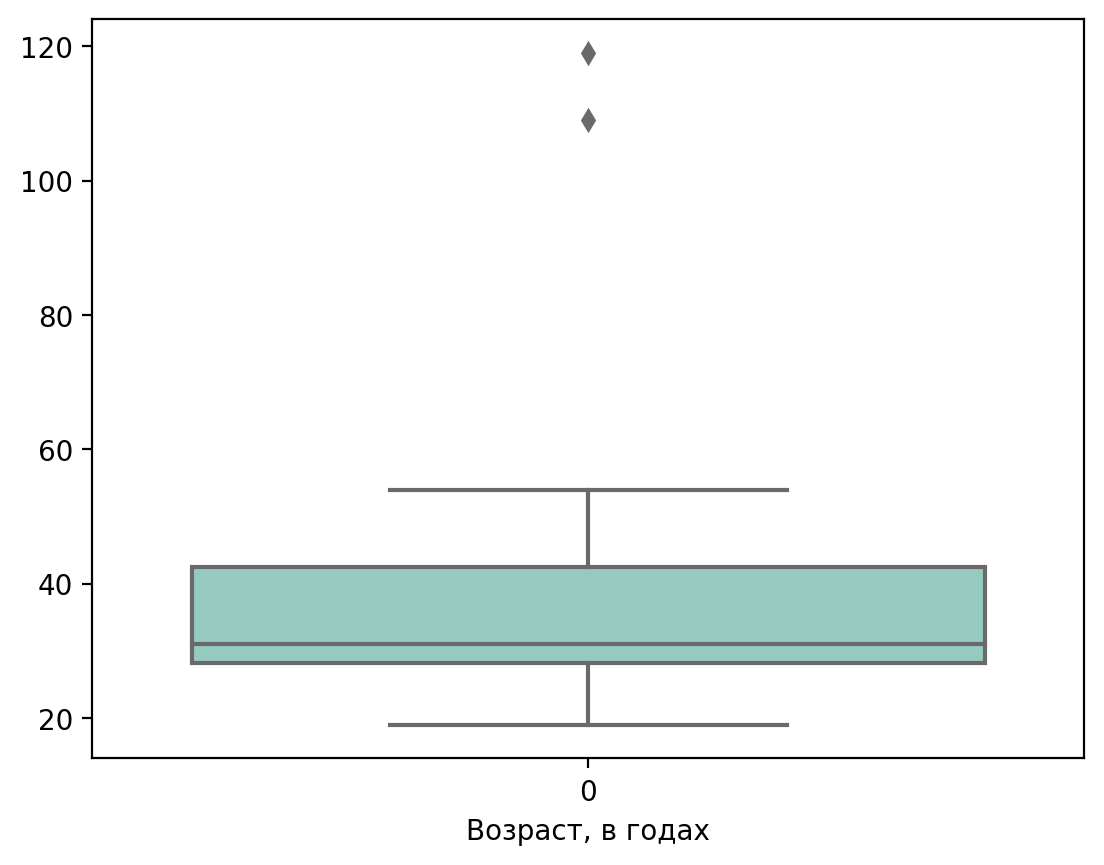

<IPython.core.display.Javascript object>

In [42]:
age_list = list(all_people_with_age.bdate)
# Since the age format is str, it needs to be converted to datetime.
for i in range(len(age_list)):
    if (age_list[i].find(".") == 1) & (
        age_list[i].find(".", age_list[i].find(".") + 1) == 3
    ):
        age_list[i] = "0" + age_list[i]
        age_list[i] = age_list[i][:3] + "0" + age_list[i][3:]

    if (age_list[i].find(".") == 1) & (
        age_list[i].find(".", age_list[i].find(".") + 1) == 4
    ):
        age_list[i] = "0" + age_list[i]

    if (age_list[i].find(".") == 2) & (
        (age_list[i].find(".", age_list[i].find(".") + 1)) == 4
    ):
        age_list[i] = age_list[i][:3] + "0" + age_list[i][3:]

    if (age_list[i].find(".") == 1) & (
        age_list[i].find(".", age_list[i].find(".") + 1) == 4
    ):
        age_list[i] = "0" + age_list[i]

all_people_with_age.insert(loc=1, column="age", value=age_list)

all_people_with_age["age_len"] = all_people_with_age.age.apply(lambda x: len(str(x)))
all_people_with_age.age = all_people_with_age.age.apply(
    lambda x: datetime.strptime(x, "%d.%m.%Y")
)


def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))


all_people_with_age["age_years"] = all_people_with_age.age.apply(
    lambda x: calculate_age(x)
)
all_people_with_age = all_people_with_age.reset_index(drop=True)
sns.boxplot(all_people_with_age["age_years"], palette="Set3").set(
    xlabel="Возраст, в годах"
)

In [43]:
# The graph shows that there are outliers in the data.
# Let's apply the z-criteria in order to identify the index of people with an outlier age.
z = np.abs(stats.zscore(all_people_with_age["age_years"]))
threshold = 3
outliers_age = list((np.where(z > 3))[0])

# Let's remove outliers from the data and calculate the median
all_people_with_age_without_outliers = all_people_with_age[
    ~all_people_with_age.index.isin(outliers_age)
]
print(f"Median age is {all_people_with_age_without_outliers.age_years.median()}")

Median age is 31.0


<IPython.core.display.Javascript object>

In [44]:
# Replace the age of people with the age-outlier by the median and calculate the median for all people with age
all_people_with_age.loc[
    outliers_age, "age_years"
] = all_people_with_age_without_outliers.age_years.median()
print(f"Median age for people with age is {all_people_with_age.age_years.median()}")

Median age for people with age is 31.0


<IPython.core.display.Javascript object>

In [45]:
print(all_people_with_age.age_years.describe())

count    30.000000
mean     33.700000
std       8.510237
min      19.000000
25%      28.250000
50%      31.000000
75%      37.500000
max      54.000000
Name: age_years, dtype: float64


<IPython.core.display.Javascript object>

In [46]:
# get the final dataset with the correct age for all users
all_people_without_age["age_years"] = all_people_with_age.age_years.median()
all_people_clear_age = pd.concat([all_people_without_age, all_people_with_age])
all_people_clear_age.reset_index(drop=True, inplace=True)
all_people_clear_age.head()

,id,first_name,last_name,can_access_closed,is_closed,bdate,city.id,city.title,home_town,deactivated,...,reply_to_user,reply_to_comment,likes.can_like,likes.count,likes.user_likes,likes.can_publish,attachments,age_years,age,age_len
0,59924813,Варвара,Николаева,True,False,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaT,NaN
1,290189663,Камиль,Магомедов,True,False,9.4,3102.0,Каспийск,Каспийск,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaT,NaN
2,333396706,Ислам,Токов,False,True,NaN,1.0,Москва,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaT,NaN
3,366884372,Лейла,Баирова,False,True,6.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaT,NaN
4,432726649,Мадина,Алиева,False,True,26.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaT,NaN


<IPython.core.display.Javascript object>

In [47]:
people_final = all_people_clear_age

<IPython.core.display.Javascript object>

### Age distribution

In [48]:
people_final["age_years"] = people_final["age_years"].apply(lambda x: int(x))

<IPython.core.display.Javascript object>

In [49]:
mean = people_final["age_years"].mean()
print(f"Mean age is {mean}")

Mean age is 32.246153846153845


<IPython.core.display.Javascript object>

In [50]:
median = people_final["age_years"].median()
print(f"Median age is {median}")

Median age is 31.0


<IPython.core.display.Javascript object>

In [51]:
mode = people_final["age_years"].mode()
print(f"Mode age is {mode[0]}")

Mode age is 31


<IPython.core.display.Javascript object>

In [52]:
print(f'Variance is {var(people_final["age_years"])}')

Variance is 34.124023668639055


<IPython.core.display.Javascript object>

In [53]:
print(f'Standart deviation is {std(people_final["age_years"])}')

Standart deviation is 5.8415771559262195


<IPython.core.display.Javascript object>

Therefore, the average age of users is within 38 +- 9.1 * 3

In [54]:
RQ = people_final["age_years"].describe()[6] - people_final["age_years"].describe()[4]
RQ

0.0

<IPython.core.display.Javascript object>

*RQ is 0, the age data is homogeneous*

In [55]:
std(people_final["age_years"]) / people_final["age_years"].mean()

0.18115578012175776

<IPython.core.display.Javascript object>

*Since the coefficient of variation does not exceed 30-35%, the age data are highly homogeneous.*

[Text(0.5, 0, 'Возраст, в годах')]

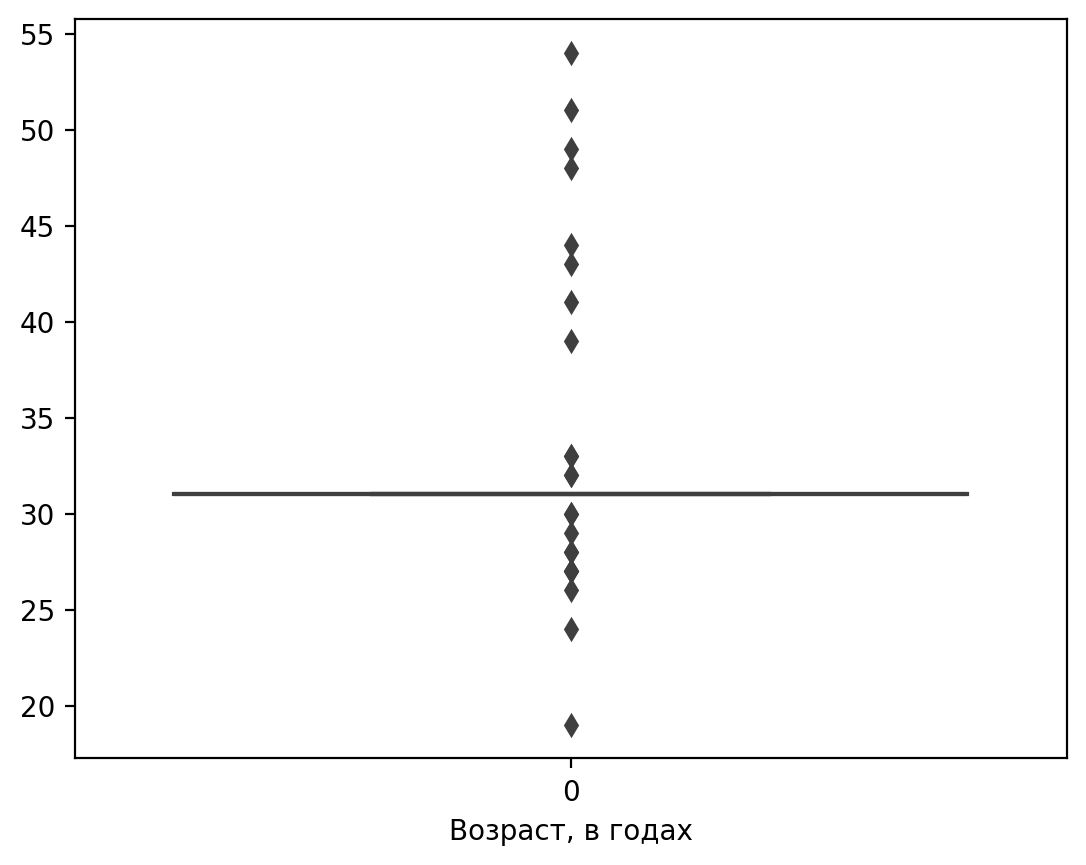

<IPython.core.display.Javascript object>

In [56]:
sns.boxplot(people_final["age_years"]).set(xlabel="Возраст, в годах")

In [57]:
# Let's look at the statistics on data in which omissions and dates of birth were removed without specifying the year

<IPython.core.display.Javascript object>

In [58]:
all_people_with_age["age_years"] = all_people_with_age["age_years"].apply(
    lambda x: int(x)
)

<IPython.core.display.Javascript object>

In [59]:
mean2 = all_people_with_age["age_years"].mean()
print(f"Mean age is {mean2}")

Mean age is 33.7


<IPython.core.display.Javascript object>

In [60]:
median2 = all_people_with_age["age_years"].median()
print(f"Median age is {median2}")

Median age is 31.0


<IPython.core.display.Javascript object>

In [61]:
mode2 = all_people_with_age["age_years"].mode()
print(f"Mode age is {mode2[0]}")

Mode age is 31


<IPython.core.display.Javascript object>

In [62]:
print(f'Variance is {var(all_people_with_age["age_years"])}')

Variance is 70.00999999999999


<IPython.core.display.Javascript object>

In [63]:
print(f'Standart deviation is {std(all_people_with_age["age_years"])}')

Standart deviation is 8.367197858303578


<IPython.core.display.Javascript object>

*Therefore, the average age of users is within 40 +- 13.6 * 3*

In [64]:
RQ = (
    all_people_with_age["age_years"].describe()[6]
    - all_people_with_age["age_years"].describe()[4]
)
RQ

9.25

<IPython.core.display.Javascript object>

In [65]:
std(all_people_with_age["age_years"]) / all_people_with_age["age_years"].mean()

0.2482848029170201

<IPython.core.display.Javascript object>

*Since the coefficient of variation does not exceed 30-35%, the age data still have a high uniformity.*

[Text(0.5, 0, 'Возраст, в годах')]

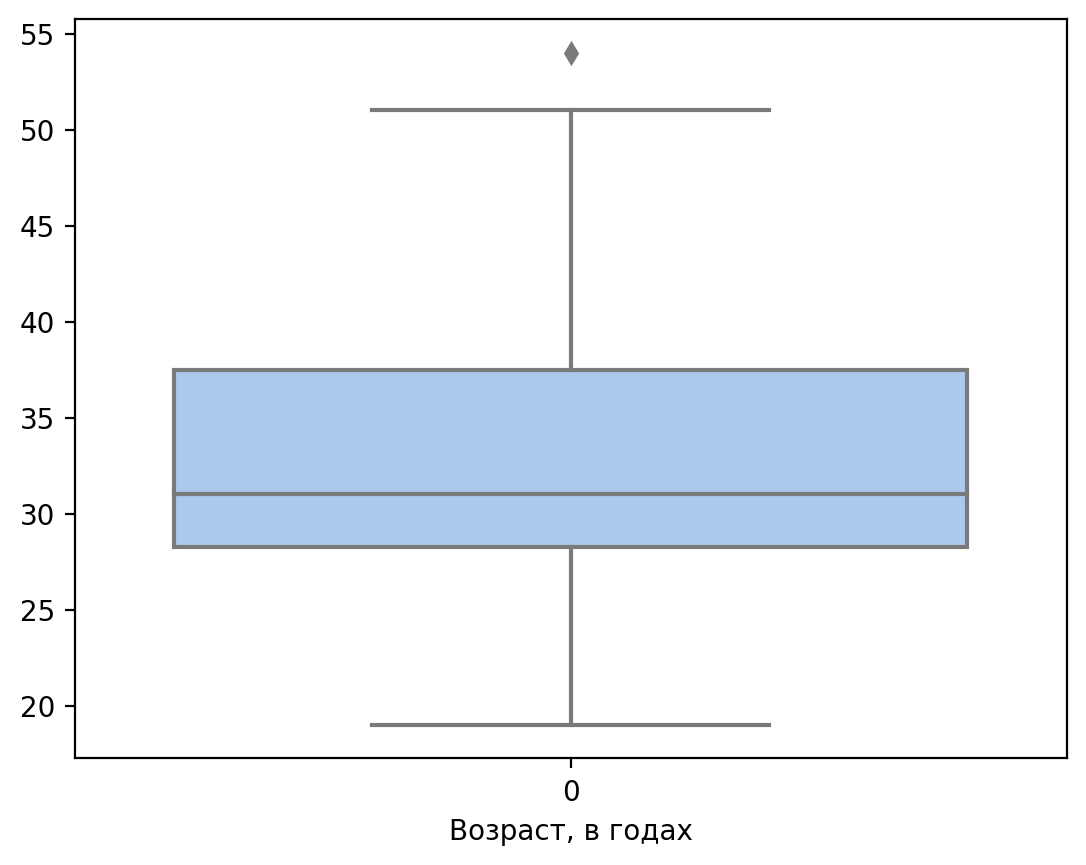

<IPython.core.display.Javascript object>

In [66]:
sns.boxplot(all_people_with_age["age_years"], palette="pastel").set(
    xlabel="Возраст, в годах"
)

### City distribution

In [67]:
pd.DataFrame(people_final["city.title"].value_counts(normalize=True).head(10))

,proportion
city.title,
Москва,0.212121
Санкт-Петербург,0.151515
Махачкала,0.090909
Каспийск,0.030303
Таганрог,0.030303
Уфа,0.030303
Кисловодск,0.030303
Омск,0.030303
Гуниб,0.030303


<IPython.core.display.Javascript object>

*Since the city variable is measured on a nominal scale, mode is used as a measure of the central trend, and the spread measure is the coefficient of qualitative variation.*

In [68]:
mode_city = people_final["city.title"].mode()[0]
print(f'Mode of the city is "{mode_city}"')

Mode of the city is "Москва"


<IPython.core.display.Javascript object>

## Identify the most popular terms used in the discussion of the topic of kicksharing

In [69]:
nltk.download('stopwords')
threads = threads.dropna(subset="text")


def comment_without_id(x):
    try:
        return x.split("],")[1]
    except:
        return x.split("],")[0]


threads.text = threads.text.apply(lambda x: comment_without_id(x))

threads = threads.dropna(subset="text")
threads = threads[threads.text != ""]

all_comments = pd.concat([comments, threads]).dropna(subset="text")
all_comments.text = all_comments.text.apply(lambda x: x.lower()).apply(
    lambda x: re.sub(r"\d+", "", x)
)
all_comments = all_comments.reset_index(drop=True)
all_comments["text_for_sentiment"] = (
    all_comments.text.apply(
        lambda x: x.translate(str.maketrans("", "", string.punctuation))
    )
    .apply(lambda x: x.strip().replace("\r\n", "\n").replace("\r", "\n"))
    .apply(lambda x: re.sub(r"\n", "", x))
)

mystem = Mystem()
russian_stopwords = stopwords.words("russian") + [
    "это",
    "хотеть",
    "делать",
    "начинать",
    "хотеться",
    "мочь",
    "который",
    "весь",
    "свой",
]


def preprocess_text(text):
    tokens = mystem.lemmatize(text.lower())
    tokens = [
        token
        for token in tokens
        if token not in russian_stopwords
        and token != " "
        and token.strip() not in punctuation
        and token not in russian_stopwords
    ]

    text = " ".join(tokens)

    return text


def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", string)


all_comments.text = all_comments.text.apply(lambda x: preprocess_text(remove_emoji(x)))
all_comments = (
    all_comments[all_comments.text != ""].dropna(subset="text").reset_index(drop=True)
)
all_comments["text"] = all_comments["text"].apply(lambda x: str(x))
clean = all_comments["text"].values

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\se\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<IPython.core.display.Javascript object>

In [70]:
np.savetxt("text.txt", all_comments["text"].values, delimiter=" ", fmt="%s")

with open("clean_data.txt", "w") as output:
    output.write(str(clean)[2:-2])

with open("text.txt", "r", encoding="utf-8") as f:
    stop_words = f.read().split()

with open("text.txt", "r", encoding="utf-8") as f:
    words = f.read().split()

<IPython.core.display.Javascript object>

In [71]:
words = [word.replace("'", "") for word in words]
words = list(filter(lambda x: x != "»", words))
words = list(filter(lambda x: x != "«", words))
data = Counter(words)

<IPython.core.display.Javascript object>

In [72]:
background_color = "#101010"
height = 720
width = 1080

word_cloud = WordCloud(background_color=background_color, width=width, height=height)

word_cloud.generate_from_frequencies(data)

word_cloud.to_file("image_11.png")

<IPython.core.display.Javascript object>

In [73]:
all_comments.to_csv("data_before_.csv", index=False)

<IPython.core.display.Javascript object>

## To determine the sentiment of messages about the kicksharing

In [74]:
data = pd.read_csv("data_before_.csv")
data.shape

(127, 21)

<IPython.core.display.Javascript object>

In [75]:
model_checkpoint = "blanchefort/rubert-base-cased-sentiment"
classifier = pipeline("sentiment-analysis", model=model_checkpoint)

<IPython.core.display.Javascript object>

In [76]:
data = data[data.text_for_sentiment.apply(lambda x: len(str(x))) < 512]
data.shape

(127, 21)

<IPython.core.display.Javascript object>

In [77]:
data['sentiment_analysis_value'] = data['text_for_sentiment'].apply(lambda x: classifier(x)[0]['label'])
data['sentiment_analysis_score'] = data['text_for_sentiment'].apply(lambda x: classifier(x)[0]['score'])
data.to_csv('data_with_sentiment.csv', index=False)

<IPython.core.display.Javascript object>

In [78]:
data = pd.read_csv("data_with_sentiment.csv")
print(data.sentiment_analysis_value.value_counts())

sentiment_analysis_value
NEUTRAL     73
POSITIVE    29
NEGATIVE    25
Name: count, dtype: int64


<IPython.core.display.Javascript object>

## To identify whether the sentiment of the messages about the phenomenon depends on the tone of the news publication

In [86]:
missing_posts = posts[posts.text.isna()]
missing_posts.columns


Index(['query', 'marked_as_ads', 'short_text_rate', 'hash', 'type',
       'attachments', 'date', 'from_id', 'id', 'is_favorite', 'owner_id',
       'post_type', 'text', 'donut.is_donut', 'comments.can_post',
       'comments.count', 'likes.can_like', 'likes.count', 'likes.user_likes',
       'likes.can_publish', 'likes.repost_disabled', 'post_source.type',
       'reposts.count', 'reposts.user_reposted', 'views.count',
       'post_source.platform', 'signer_id', 'comments.groups_can_post',
       'zoom_text'],
      dtype='object')

<IPython.core.display.Javascript object>

In [88]:

missing_posts = missing_posts.dropna() #subset="copy_history"
missing_posts['copy_history']=[]
missing_posts.columns

Index(['query', 'marked_as_ads', 'short_text_rate', 'hash', 'type',
       'attachments', 'date', 'from_id', 'id', 'is_favorite', 'owner_id',
       'post_type', 'text', 'donut.is_donut', 'comments.can_post',
       'comments.count', 'likes.can_like', 'likes.count', 'likes.user_likes',
       'likes.can_publish', 'likes.repost_disabled', 'post_source.type',
       'reposts.count', 'reposts.user_reposted', 'views.count',
       'post_source.platform', 'signer_id', 'comments.groups_can_post',
       'zoom_text', 'copy_history'],
      dtype='object')

<IPython.core.display.Javascript object>

In [90]:
df_missing_posts = pd.DataFrame()
for i in missing_posts["copy_history"].index:
    miss_post = ast.literal_eval(missing_posts["copy_history"][i])
    df_miss_post = pd.json_normalize(miss_post)
    df_missing_posts = pd.concat([df_miss_post, df_missing_posts])

<IPython.core.display.Javascript object>

In [91]:
df_missing_posts = df_missing_posts.set_index(missing_posts.index)

<IPython.core.display.Javascript object>

In [92]:
for i in missing_posts.index:
    posts.text[i] = df_missing_posts.text[i]

<IPython.core.display.Javascript object>

In [93]:
posts = posts.dropna(subset="text")

<IPython.core.display.Javascript object>

In [94]:
posts = posts.reset_index(drop=True)

<IPython.core.display.Javascript object>

In [95]:
posts.text = posts.text.apply(lambda x: x.lower())
posts.text = posts.text.apply(lambda x: re.sub(r"\d+", "", x))
posts = posts.reset_index(drop=True)
posts.text = posts.text.apply(
    lambda x: x.translate(str.maketrans("", "", string.punctuation))
)
posts.text = posts.text.apply(
    lambda x: x.strip().replace("\r\n", "\n").replace("\r", "\n")
)
posts.text = posts.text.apply(lambda x: re.sub(r"\n", "", x))
posts.text = posts.text.apply(lambda x: re.sub(r"\n", "", x))
posts["text_for_sentiment"] = posts.text

<IPython.core.display.Javascript object>

In [96]:
posts.to_csv('posts_for_sentiment.csv', index=False)

<IPython.core.display.Javascript object>

In [97]:
posts = pd.read_csv("posts_for_sentiment.csv")

<IPython.core.display.Javascript object>

In [98]:
posts["len_of_post"] = posts["text_for_sentiment"].apply(lambda x: len(x))

<IPython.core.display.Javascript object>

[Text(0.5, 0, 'Длина новостной публикации'), Text(0, 0.5, 'Количество постов')]

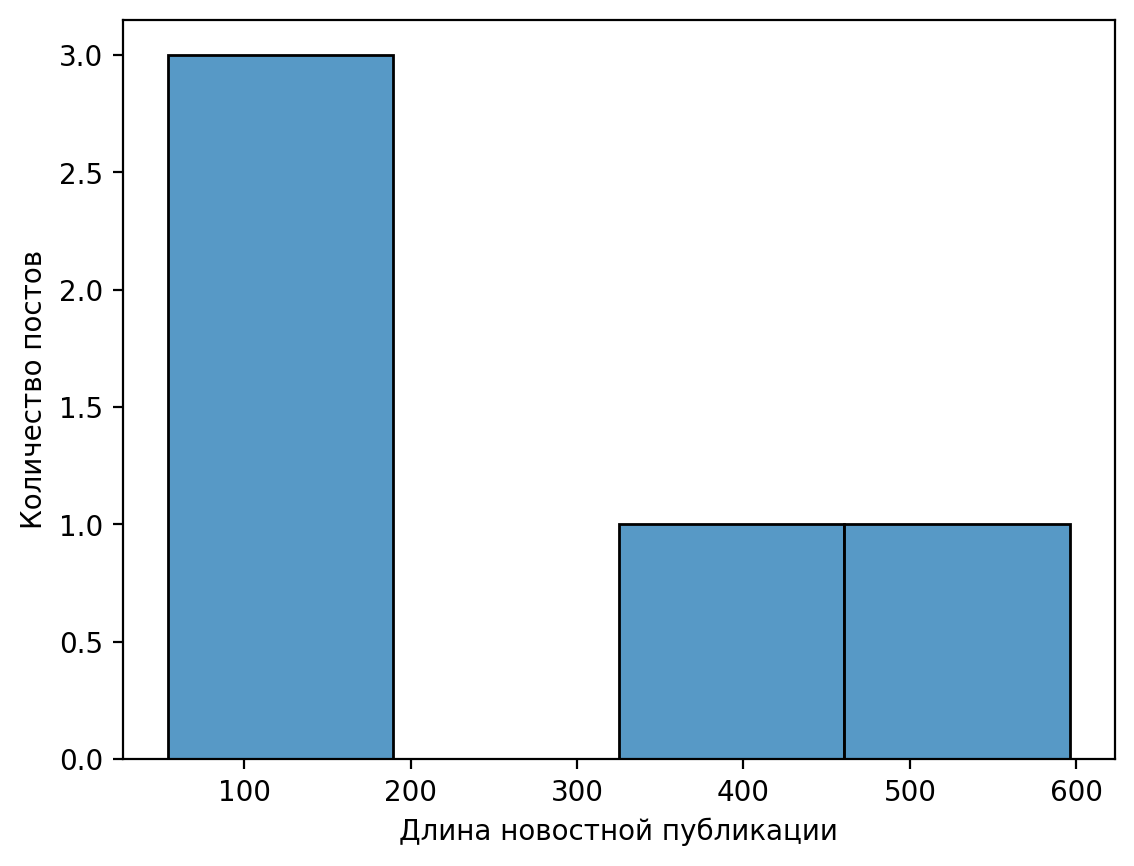

<IPython.core.display.Javascript object>

In [99]:
sns.histplot(data=posts, x=posts["len_of_post"]).set(
    xlabel="Длина новостной публикации", ylabel="Количество постов"
)

In [100]:
print(f'Median length of post {posts["len_of_post"].median()}')

Median length of post 150.0


<IPython.core.display.Javascript object>

In [101]:
print(
    f'Percentage of posts with length less that 512 is {posts[posts["len_of_post"] < 512].shape[0] / posts.shape[0]}'
)

Percentage of posts with length less that 512 is 0.8


<IPython.core.display.Javascript object>

In [102]:
posts = posts[posts.text_for_sentiment.apply(lambda x: len(x)) < 512]
posts['sentiment_analysis_value'] = posts['text_for_sentiment'].apply(lambda x: classifier(x)[0]['label'])
posts['sentiment_analysis_score'] = posts['text_for_sentiment'].apply(lambda x: classifier(x)[0]['score'])
posts.to_csv('posts_with_sentiment.csv', index=False)

<IPython.core.display.Javascript object>

In [103]:
posts = pd.read_csv("posts_with_sentiment.csv")

<IPython.core.display.Javascript object>

In [104]:
posts = posts.rename(
    columns={
        "sentiment_analysis_value": "sentiment_analysis_value_post",
        "sentiment_analysis_score": "sentiment_analysis_score_post",
    }
)

<IPython.core.display.Javascript object>

In [105]:
print(posts.sentiment_analysis_value_post.value_counts())

sentiment_analysis_value_post
NEUTRAL     3
POSITIVE    1
Name: count, dtype: int64


<IPython.core.display.Javascript object>

In [106]:
posts_with_sentiment_for_chi_square = posts[
    ["id", "sentiment_analysis_value_post", "sentiment_analysis_score_post"]
]
posts_with_sentiment_for_chi_square_fot_dict = posts_with_sentiment_for_chi_square.set_index(
    "id"
)
dict_posts = posts_with_sentiment_for_chi_square_fot_dict[
    "sentiment_analysis_value_post"
].to_dict()
dict_posts_score = posts_with_sentiment_for_chi_square_fot_dict[
    "sentiment_analysis_score_post"
].to_dict()

<IPython.core.display.Javascript object>

In [107]:
data2 = data[
    data["post_id"].isin(posts_with_sentiment_for_chi_square.id.unique())
].reset_index(drop=True)
data2.post_id = data2.post_id.apply(lambda x: int(x))

<IPython.core.display.Javascript object>

In [108]:
data = pd.read_csv("data_with_sentiment.csv")
data2["sentiment_post_value"] = data2.post_id.apply(lambda x: dict_posts[x])
data2["sentiment_post_score"] = data2.post_id.apply(lambda x: dict_posts_score[x])
crosstab1 = pd.crosstab(
    data2["sentiment_post_value"], data2["sentiment_analysis_value"]
)

<IPython.core.display.Javascript object>

In [109]:
crosstab1

sentiment_analysis_value,NEGATIVE,NEUTRAL,POSITIVE
sentiment_post_value,,,
NEUTRAL,3,11,4
POSITIVE,9,22,6


<IPython.core.display.Javascript object>

In [110]:
stats.chi2_contingency(crosstab1)

Chi2ContingencyResult(statistic=0.5711961961961962, pvalue=0.7515646105030913, dof=2, expected_freq=array([[ 3.92727273, 10.8       ,  3.27272727],
       [ 8.07272727, 22.2       ,  6.72727273]]))

<IPython.core.display.Javascript object>

In [111]:
data2_without_neutral = data2[
    (data2["sentiment_post_value"] != "NEUTRAL")
    & (data2["sentiment_analysis_value"] != "NEUTRAL")
]

<IPython.core.display.Javascript object>

In [112]:
crosstab_without_neutral = pd.crosstab(
    data2_without_neutral["sentiment_post_value"],
    data2_without_neutral["sentiment_analysis_value"],
)
crosstab_without_neutral

sentiment_analysis_value,NEGATIVE,POSITIVE
sentiment_post_value,,
POSITIVE,9,6


<IPython.core.display.Javascript object>